# Introduction
While I'm neither a fan nor necessarily a hater of the Kardashians and Jenners, I find that polarizing family particularly intriguing. <strong> Why?</strong> Their incredible marketing prowess. Say what you will about them and what they stand for, they are great at the hype game. Everything they touch turns to content.The sisters in particular over the past decade have been especially productive in this regard. 


Let's get some facts straight. A cursory search online hints at the "sisters" being the following daughters of Kris Jenner. Three from her first marriage to lawyer <a href="https://en.wikipedia.org/wiki/Robert_Kardashian"> Robert Kardashian</a> 

- <a href="https://en.wikipedia.org/wiki/Kourtney_Kardashian">Kourtney Kardashian</a> (Born in 1979)
- <a href="https://en.wikipedia.org/wiki/Kim_Kardashian">Kim Kardashian</a> (Born in 19890)
- <a href="https://en.wikipedia.org/wiki/Khlo%C3%A9_Kardashian">Khloé Kardashian</a> (Born in 1984)

<p>And two from her second marriage to Olympic gold medal-winning decathlete, <a href="https://en.wikipedia.org/wiki/Caitlyn_Jenner">Caitlyn Jenner</a> (formerly Bruce Jenner):</p>

- <a href="https://en.wikipedia.org/wiki/Kendall_Jenner">Kendall Jenner</a> (Born in 1995)
- <a href="https://en.wikipedia.org/wiki/Kylie_Jenner">Kylie Jenner</a> (Born in 1997)

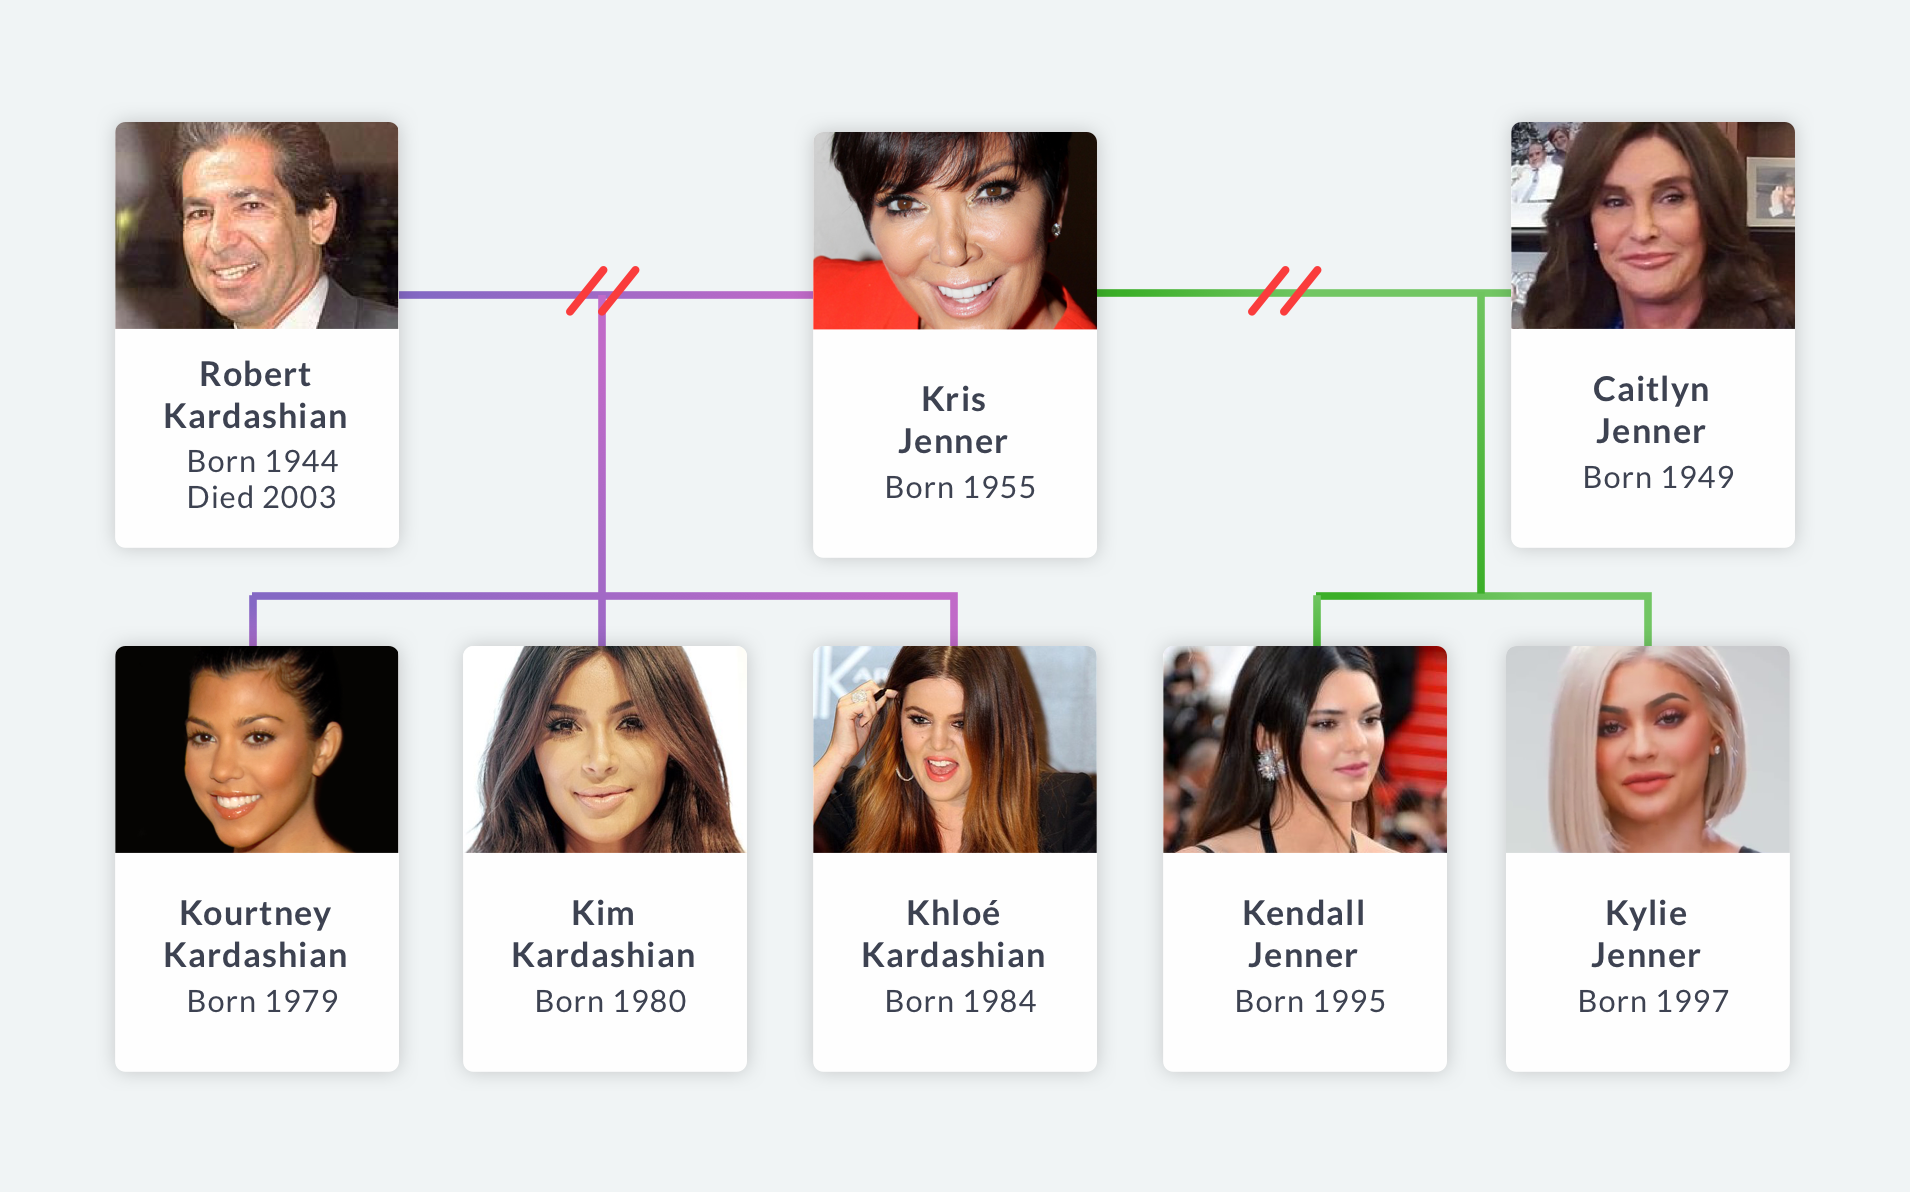

In this Project, I will be exploring the data undergirding the hype in the form of search interest data from Google Trends. I'll be recreating the Google Trends plot to visualize their ups and downs over time, then make a few custom plots of my own. And I'll be answering the big question: <strong>is Kim even the most famous sister anymore?</strong>

First, let's load and inspect our Google Trends data, which was downloaded in CSV form. The query parameters: each of the sisters, worldwide search data, 2007 to present day. (2007 was the year Kim became "active" according to Wikipedia)

# Let's Dig Into It - Load the Data

In [1]:
import pandas as pd

In [2]:
trends=pd.read_csv('Kardashians.csv')
trends.head()

,Month,Kim Kardashian: (Worldwide),Khloé Kardashian: (Worldwide),Kourtney Kardashian: (Worldwide),Kendall Jenner: (Worldwide),Kylie Jenner: (Worldwide)
0,2007-01,2,<1,<1,<1,2
1,2007-02,12,<1,<1,<1,2
2,2007-03,9,<1,<1,<1,1
3,2007-04,6,<1,<1,<1,1
4,2007-05,6,<1,<1,<1,2


# Renaming Columns

So we have a column for each month since January 2007 and a column for the worldwide search interest for each of the sisters each month. By the way, Google defines the values of search interest as:

Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.

Okay, that's great Google, but you are not making this data easily analyzable for us. I see a few things. Let's do the column names first. A column named "Kim Kardashian: (Worldwide)" is not the most usable for coding purposes. Let's shorten those so we can access their values better. Might as well standardize all column formats, too.

In [3]:
trends.columns = ['month','kim','khloe','kourtney','kendell','kylie']

In [4]:
trends.head()

,month,kim,khloe,kourtney,kendell,kylie
0,2007-01,2,<1,<1,<1,2
1,2007-02,12,<1,<1,<1,2
2,2007-03,9,<1,<1,<1,1
3,2007-04,6,<1,<1,<1,1
4,2007-05,6,<1,<1,<1,2


# Taking the Pesky '<' sign off

That's better. We don't need to scroll our eyes across the table to read the values anymore since it is much less wide. And seeing five columns that all start with the letter "k" looks brilliant.

The next thing I see that is going to be an issue is that "<" sign. If "a score of 0 means there was not enough data for this term," "<1" must mean it is between 0 and 1 and Google does not want to give us the fraction from google.trends.com for whatever reason. That's fine, but this "<" sign means we won't be able to analyze or visualize our data right away because those column values aren't going to be represented as numbers in our data structure. 

I will confirm this by inspecting the data types...

In [5]:
trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 6 columns):
month       147 non-null object
kim         147 non-null int64
khloe       147 non-null object
kourtney    147 non-null object
kendell     147 non-null object
kylie       147 non-null int64
dtypes: int64(2), object(4)
memory usage: 7.0+ KB


## Taking the '<' off

okay, the khloe, kourtney, and kendall columns aren't integers like the kim and kylie columns are. Again, because of the "<" sign that indicates a search interest value between zero and one. Is this an early hint at the hierarchy of sister popularity? We'll see shortly. Before that, we'll need to remove that pesky "<" sign. Then we can change the type of those columns to integer.

- I will use a for loop to loop through each column in trends.columns.

- an <strong>if</strong> statement to control the flow of the for loop to only proceed if <strong> "<\" </strong> exists in the column's values. The <strong>to_string()</strong> method in conjunction with the <strong>in</strong> membership operator is handy.

- Remove the "<" character by replacing it with the empty string ("") using the <strong><str.replace() </strong> method.
Cast the columns that previously had "<" characters to integer type using the pandas to_numeric() function.



In [6]:
for column in trends.columns:
    #modify columns that have the '<' sign
    if '<' in trends[column].to_string():
        #Remove '<' and covert dtype to integers
        trends[column]=trends[column].str.replace('<',"")
        trends[column]=pd.to_numeric(trends[column])
trends.info()
trends.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 6 columns):
month       147 non-null object
kim         147 non-null int64
khloe       147 non-null int64
kourtney    147 non-null int64
kendell     147 non-null int64
kylie       147 non-null int64
dtypes: int64(5), object(1)
memory usage: 7.0+ KB


,month,kim,khloe,kourtney,kendell,kylie
0,2007-01,2,1,1,1,2
1,2007-02,12,1,1,1,2
2,2007-03,9,1,1,1,1
3,2007-04,6,1,1,1,1
4,2007-05,6,1,1,1,2


As can be seen, the '<' signs in the columns 'khloe', 'kourtney' and 'kendall' are all gone. Awesome!

# To Datetime 
Now that there are no more "<" signs. All the sister columns are of integer type.

It's now time [pun unintended]  to convert our month column from type object to datetime to make our date data more accessible.

In [7]:
#convert the month to datetime
trends.month=pd.to_datetime(trends.month)

In [8]:
trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 6 columns):
month       147 non-null datetime64[ns]
kim         147 non-null int64
khloe       147 non-null int64
kourtney    147 non-null int64
kendell     147 non-null int64
kylie       147 non-null int64
dtypes: datetime64[ns](1), int64(5)
memory usage: 7.0 KB


In [9]:
trends.head()

,month,kim,khloe,kourtney,kendell,kylie
0,2007-01-01,2,1,1,1,2
1,2007-02-01,12,1,1,1,2
2,2007-03-01,9,1,1,1,1
3,2007-04-01,6,1,1,1,1
4,2007-05-01,6,1,1,1,2


## Set month as index

In [10]:
# set the month column as the index
trends=trends.set_index('month')
trends.head()

,kim,khloe,kourtney,kendell,kylie
month,,,,,
2007-01-01,2,1,1,1,2
2007-02-01,12,1,1,1,2
2007-03-01,9,1,1,1,1
2007-04-01,6,1,1,1,1
2007-05-01,6,1,1,1,2


# Time to Answer the Questions
Okay! So our data is ready to plot. Because are cleaning the data, we only need one line of code to remake the Google Trends chart, plus another line to make the plot show up in our notebook.

In [11]:
%matplotlib inline

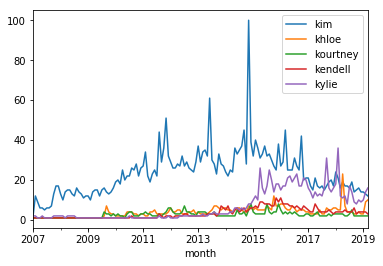

In [12]:
trends.plot()

From here, it looks like Kim is the most popular amongst the sisters. But has that always been the case? We will find out

Oh my! There is so much to make sense of here. Kim's sharp rise in <strong>2007</strong>, with the beginning of <strong>Keeping Up with the Kardashians</strong>, among other things. 
There was no significant search interest for the other four sisters until mid-2009 when <strong>Kourtney</strong> and <strong>Khloé</strong> launched the reality television series,
<strong>Kourtney and Khloé Take Miami</strong>. Then there was Kim's rise from famous to literally more famous than God in <strong>2011</strong>. This Cosmopolitan article covers the<strong> timeline</strong> that includes the <strong>launch of music videos</strong>,<strong> fragrances</strong>, <strong>iPhone </strong>and <strong>Android games</strong>, another <strong>television series</strong>, joining <strong>Instagram</strong>, and more. Then there was Kim's ridiculous spike in December 2014: <strong>posing naked on the cover of Paper Magazine in a bid to break the internet </strong>

A curious thing starts to happen after that bid as well. Let's zoom in...

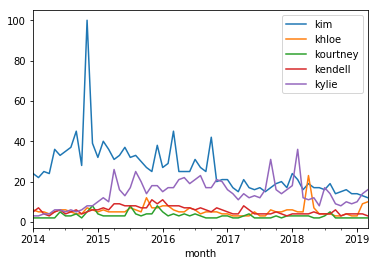

In [13]:
#Zoom in from January 2014
trends.loc["2014-01-01":].plot()

It looks like my suspicion may be true: Kim is not always the most searched Kardashian sister. Since late-2016, at various months, Kylie overtook Kim. The two big spikes where she smashed Kim's search interest: in September 2017 when it was reported that Kylie was expecting her first child with rapper <strong>Travis Scott</strong> and in February 2018 when she gave birth to her daughter, <strong>Stormi Webster</strong>. The continued success of Kylie Cosmetics has kept her in the news, not to mention making her the <strong>"The Youngest Self-Made Billionaire Ever"</strong> according to Forbes.



## Smoothen out the curves
These fluctuations are descriptive but do not really help us answer our question: <strong>is Kim even the most famous sister anymore?</strong> We can use rolling means to smooth out short-term fluctuations in time series data and highlight long-term trends. Let's make the window twelve months a.k.a. one year.

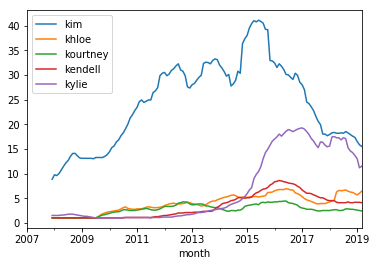

In [14]:
#using the rolling means to smoothen out the curves with months
trends.rolling(window=12).mean().plot()

Whoa, okay! So by this metric, Kim is still the most famous sister despite Kylie being close and nearly taking her crown. Honestly, the biggest takeaway from this whole exercise might be Kendall not showing up that much. It makes sense, though, despite her wildly successful modeling career. Some have called her <strong>"the only normal one in her family"</strong> as she tends to shy away from the more dramatic and controversial parts of the media limelight that generate oh so many clicks.



It appears that since 2015, Kim Kardashian has been the most popular sister. Going into the future, no one can really tell. Maybe the pendulum might be swinging but for now, this is what we can work with

Let's end this analysis with one last plot. In it, we will plot (pun!) the Kardashian sisters against the Jenner sisters to see which family line is more popular now. We will use average search interest to make things fair, i.e., total search interest divided by the number of sisters in the family line.

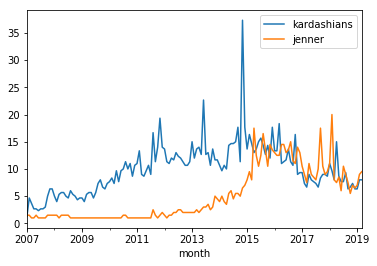

In [15]:
#Average search interest amongst each family line
trends['kardashians']=(trends['kim']+trends['khloe']+trends['kourtney'])/3
trends['jenner']=(trends['kendell']+trends['kylie'])/2

#plot average family line search interest vs. month
trends[['kardashians','jenner']].plot()

So we see it. It appears the Jenner sisters are becoming a lot more popular than the Kardashians lately. Will the trends continue, we are yet to see.

This concludes the first part of the project

We be answering more questions soon